# 1. Proyecto Data Science G56: Predicción estadio de cáncer de mama

### Integrantes:

* Macarena Araneda.
* Marlene Concha.
* Francisca Gálvez.
* Daniel Herrera.
* Jairo Rojas.
* Javier Rojas.

### Profesor:

* Camilo González.



## 1.1 Definición del problema.
La gran cantidad de datos que existen en el país sobre el cáncer de mama, por lo general, no se encuentran tabulados, ni estructurados, es por ello, que se debe recalcar la importancia de mejorar la calidad de los datos en salud.

## 1.2 Solución propuesta.
Con una data limpia y estructurada se pueden analizar datos y tomar decisiones informadas. Además, se puede trabajar en modelos predictivos, que pueden ser una herramienta de apoyo a la hora de priorizar pacientes.

El objetivo de este proyecto es trabajar en un modelo que permita predecir el estadio del cáncer de mama, a partir de datos patológicos y clínicos asociados al cáncer. Con esto, se espera generar una herramienta que permita predecir qué tan agresivo es o será el cáncer de mama. Lo anterior, podría ayudar a los referentes clínicos a priorizar la atención de pacientes según la gravedad de su neoplasia.

## 1.3 Objetivo principal
El objetivo es desarrollar un proyecto que priorice la atención médica a los pacientes con cáncer de mama, entregando un enfoque predictivo y basado en datos entregados por el equipo de Informática Médica y Data Science de la FALP (Fundación Arturo López Pérez).

## 1.4 Naturaleza de los datos.
El dataset contiene la cantidad de 24 columnas y 19.110 filas.
* RegistroTumores_FALP.csv = 19110 rows × 24 columns.* RegistroTumores_FALP.csv = 19110 rows × 24 columns.

## 1.5 Columnas del Dataset


1. **ID_CASO**: ID del paciente.
2. **CATEGORIA**: Categoría diagnóstica del tumor (ej.: órgano digestivo).
3. **SUBCATEGORIA**: Subcategoría diagnóstica del tumor (ej.: colon, páncreas o estómago).
4. **SEXO**: Sexo paciente. Opciones: F o M, Femenino o Masculino respectivamente.
5. **EDAD**: Edad del paciente.
6. **REGIÓN**: Región del país de residencia.
7. **COMUNA**: Comuna o condado de residencia.
8. **CODIGO_COMUNA**: Código único territorial.
9. **PREVISIÓN**: Seguro médico del paciente. Opciones: FONASA, BENEFICIARIO, ISAPRE, PARTICULAR, FFAA.
10. **CONVENIO_ONCOLOGICO**: Beneficiario FALP. Opciones: SI, NO.
11. **FECHA_DIAGNOSTICO**: Fecha del tamaño del tumor.
13. **CN**: Descripción clínica si el tumor ha alcanzado ganglios linfáticos.
14. **CM**: Descripción clínica si el cáncer hizo metástasis.
15. **PT**: Descripción patológica del tamaño del tumor.
16. **PN**: Descripción patológica si el tumor ha alcanzado ganglios linfáticos.
17. **PM**: Descripción patológica si el cáncer hizo metástasis.
18. **ESTADIO**: Estadio del cáncer en la fecha de diagnóstico. Opciones: O, I, II, III, IV.
19. **EXTENSION_DIAGNOSTICA**: Extensión del tumor en la fecha de diagnóstico. Opciones: LOCAL, REGIONAL, AVANZADO, PERITONEAL.
20. **ESTADO_VITAL**: estado vital del paciente. Opciones: VIVO, FALLECIDO.
21. **FECHA_DEFUNCION**: Fecha de fallecimiento.
22. **TTO_FALP_SUBCATEGORIA**: Subcategoría del tratamiento.
23. **FECHA_INICIO_TTO**: Fecha de inicio del tratamiento.
24. **FECHA_FIN_TTO**: Fecha de finalización del tratamiento.

## 1.6 Vector objetivo.
* El vector objetivo será la variable STATUS que determinaremos según la agrupación de la variable ESTADIO.

# **2. Importación de módulos**
Para comenzar con nuestro análisis realizaremos la importación de todos los módulos necesarios.

In [3]:
# Instalar e importar módulos necesarios para el análisis de la investigación
! pip uninstall scikit-learn -y
! pip install -U scikit-learn

! pip install pandas-profiling
! pip install kora -q
! pip install anvil-uplink

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Análisis exploratorio
from pandas_profiling import ProfileReport
import missingno

# Modelamiento
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import classification_report

# Otros
import warnings
warnings.filterwarnings("ignore")

# Funciones externas
import funciones as fx

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


C:\Users\javie\AppData\Local\Temp\ipykernel_14588\1736881139.py:17: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
# Import Anvil (Web App)
import anvil.server
anvil.server.connect("server_6S4I72HC2Y4LCB2JWDY5LU2U-D5CMXC3TX7WCHP4H")

Exception in thread Thread-36 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\javie\anaconda3\lib\site-packages\anvil\server.py", line 408, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\Users\javie\anaconda3\lib\site-packages\anvil\server.py", line 398, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\Users\javie\anaconda3\lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\javie\anaconda3\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\javie\anaconda3\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\javie\anaconda3\lib\site-packages\anvil\server.py

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


## 2.1 Importar base de datos

In [ ]:
# Lectura de la base de datos desde el csv
df_falp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RegistroTumores_FALP.csv')
df_falp

In [ ]:
# Se decidió centrar la investigación solo utilizando las filas que correspondan al Cancer de mama
# ya que es la CATEGORIA más presente en la data
df_falp['CATEGORIA'].value_counts()

MAMA                                                         5575
ORGANOS DIGESTIVOS                                           3290
PIEL                                                         2296
ORGANOS GENITALES MASCULINOS                                 1859
TIROIDES Y OTRAS GLANDULAS ENDOCRINAS                        1491
TRACTO URINARIO                                              1291
ORGANOS GENITALES FEMENINOS                                  1258
SISTEMA RESPIRATORIO Y ÓRGANOS INTRATORÁCICOS                1059
LABIO, CAVIDAD BUCAL Y FARINGE                                324
TEJIDO CONJUNTIVO, SUBCUTÁNEO Y DE OTROS TEJIDOS BLANDOS      205
ENCÉFALO, OJO Y OTRAS PARTES DEL SISTEMA NERVIOSO CENTRAL     183
SITIO PRIMARIO DESCONOCIDO                                    159
HUESOS,ARTICULACIONES Y CARTÍLAGO ARTICULAR                    68
PERITONEO Y RETROPERITONEO                                     47
SITIOS MAL DEFINIDOS Y OTROS                                    4
NERVIOS PE

## 2.2 Filtro y copia de la Data

In [ ]:
# La data se filtra para trabajarla solo con las filas de CATEGORIA MAMA
df_falp_mama = df_falp[df_falp['CATEGORIA'] == 'MAMA']
df_falp_mama

In [ ]:
# De un data oficial de 19.110 filas se trabajará con un data de 5.575 filas.

# **3. Análisis Exploratorio de datos**

In [ ]:
# Reporte e información de la base de datos
profile_falp_mama = ProfileReport(df_falp_mama)
profile_falp_mama

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### AGREGAR DESCRIPCIÓN/RELACIÓN ENTRE INFORMACIÓN QUE ENTREGA EL INFORME

<Axes: >

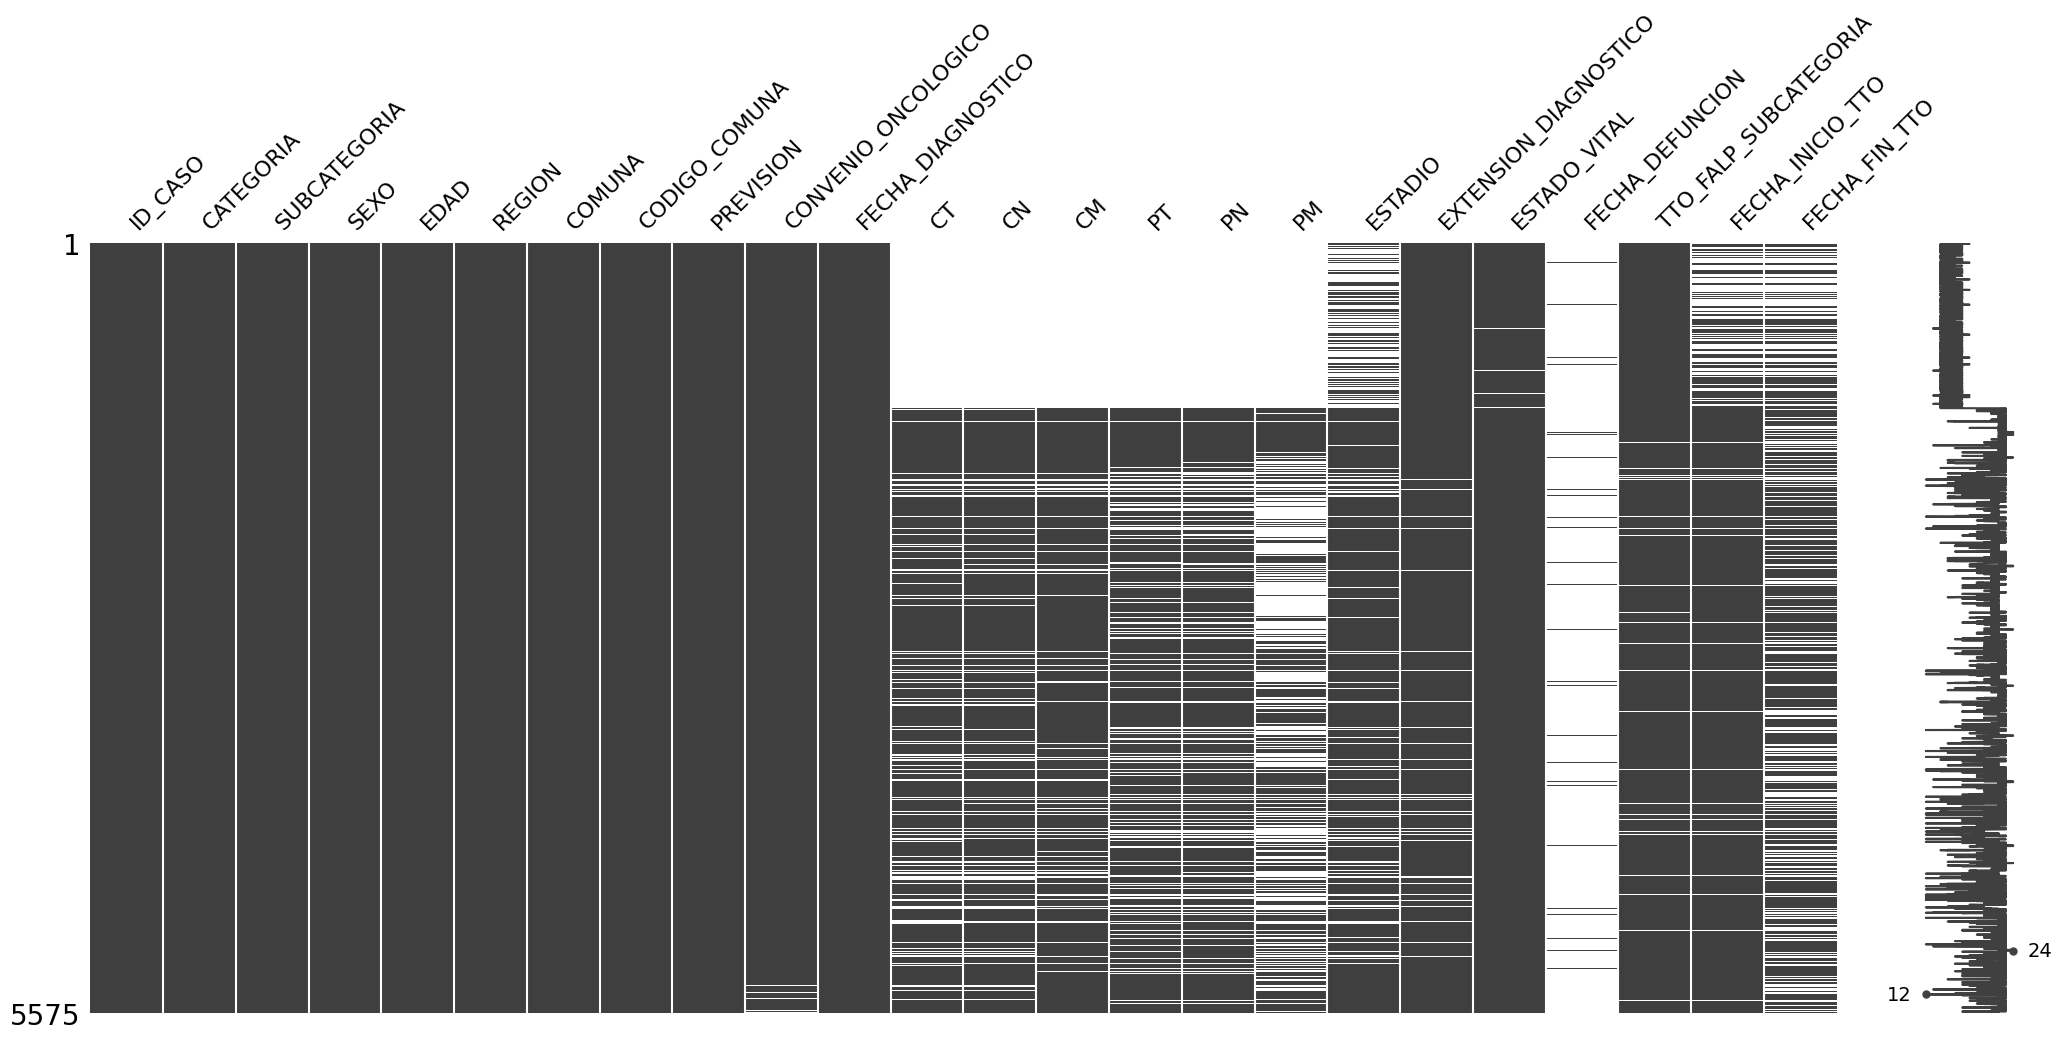

In [ ]:
missingno.matrix(df_falp_mama)

### Agregar información y decisiones sobre información NaN

In [ ]:
# Exportar reporte como documento HTML
profile_falp_mama.to_file("your_report_cancer_mamario.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **4. Preprocesamiento de datos**

Para el tratamiento de la base de datos, se siguieron los siguientes pasos:

In [ ]:
# Se revisan los valores de CATEGORIA y SUBCATEGORIA
df_falp_mama['CATEGORIA'].value_counts()

MAMA    5575
Name: CATEGORIA, dtype: int64

In [ ]:
df_falp_mama['SUBCATEGORIA'].value_counts()

MAMA (excluye piel de la mama, C44.5)    5575
Name: SUBCATEGORIA, dtype: int64

In [ ]:
# Se determina sacar ambas variables ya que no serán significativas en la definición del vector objetivo.
# Además, se eliminarán las columnas ID_CASO y CODIGO_COMUNA, ya que poseen información redundante.
df_falp_mama = df_falp_mama.drop(columns=['CATEGORIA','SUBCATEGORIA','ID_CASO','CODIGO_COMUNA'])

## 4.1 Eliminacion de todas las filas sin un ESTADIO

Se eliminaran todas las filas que carezcan de un ESTADIO, ya que se evita tener el vector objetivo con valores faltantes. Además, se guardaran las filas que carezcan del ESTADIO, ya que se utilizarán como muestras para utilizar los modelos predictivos.

In [ ]:
faltantes_estadio = df_falp_mama[df_falp_mama["ESTADIO"].isna()]
df_falp_mama = df_falp_mama[~df_falp_mama["ESTADIO"].isna()]

## 4.2 Recodificación EDAD

Se agrupó la columna EDAD según el RANGO_ETARIO.

In [ ]:
# Binarizar EDAD
df_falp_mama["RANGO_ETARIO"] = pd.cut(
    df_falp_mama["EDAD"],
    [-np.inf, 5, 11, 18, 26, 60, np.inf],
    labels=["Primera Infancia", "Infancia", "Adolescencia", "Juventud", "Adultez", "Vejez"],
)
df_falp_mama = df_falp_mama.drop(columns=["EDAD"])

In [ ]:
df_falp_mama['RANGO_ETARIO'].value_counts()

Adultez             3277
Vejez               2295
Juventud               3
Primera Infancia       0
Infancia               0
Adolescencia           0
Name: RANGO_ETARIO, dtype: int64

## 4.3 Recodificación de FECHAS_

Se optó por recodificar todas las variables fechas de tipo string a un datetime. Luego, se calculó la duración de los tratamientos y la espera entre el diagnóstico y el inicio del tratamiento. Las columnas calculadas fueron agregadas al dataframe.

In [ ]:
# Cambiar valores string de columnas 'FECHAS_' por tipo de datos datetime64 para su posterior manipulación.
columnas_fechas = []

for colname in df_falp_mama.columns:
  if re.match('FECHA_', colname):
    columnas_fechas.append(colname)
    df_falp_mama[colname] = pd.to_datetime(df_falp_mama[colname])

In [ ]:
# Generar columna que registre en meses la duración de un tratamiento DIAS_TTO
df_falp_mama['DIAS_TTO'] = df_falp_mama['FECHA_FIN_TTO'] - df_falp_mama['FECHA_INICIO_TTO']
# Convertir valor en float para graficar
df_falp_mama['DIAS_TTO'] = df_falp_mama['DIAS_TTO'].dt.days

In [ ]:
# Generar columna que para observar la fecha de diagnóstico vs la fecha de defunción
df_falp_mama['PROYECCION_DIAS'] = df_falp_mama['FECHA_DEFUNCION'] - df_falp_mama['FECHA_DIAGNOSTICO']
#  Convertir valor en int para graficar
df_falp_mama['PROYECCION_DIAS'] = df_falp_mama['PROYECCION_DIAS'].dt.days

In [ ]:
# Por ahora dejaremos una copia de la base de datos sin las fechas
columnas_fechas
mama = df_falp_mama.drop(columns=columnas_fechas)
mama = mama.drop(columns=['PROYECCION_DIAS','DIAS_TTO'])

## 4.4 Valores NaN
Se reemplazaron los valores NaN con el valor “SO” (Sin Observación) en aquellas filas que al menos tengan un valor distinto a NaN en las columnas que definen el detalle del tumor (TC, CN, CM, PT, PN, PM).

In [ ]:
# Rellena los datos clínicos y patológicos con SO
columnas_a_rellenar_nan = ["CT", "CN", "CM", "PT", "PN", "PM"]

df_falp_mama[columnas_a_rellenar_nan] = df_falp_mama[columnas_a_rellenar_nan].fillna("SO")
mama[columnas_a_rellenar_nan] = mama[columnas_a_rellenar_nan].fillna("SO")

## 4.4 Columna STATUS (target)

* Se creó la columna STATUS (vector objetivo) utilizando la variable ESTADIO. Si la variable ESTADIO era 0 o I, entonces se asignó el valor “1” (Leve). Si la variable ESTADIO era II o III, entonces se asignó el valor “2” (Moderado). Finalmente, si la variable ESTADIO era IV, entonces se asignó el valor “3” (Alto).

In [ ]:
# Crea el vector objetivo
reemplazar_estadio = {
    "0": 1,
    "I": 1,
    "II": 2,
    "III": 3,
    "IV": 3,
}
mama["STATUS"] = mama["ESTADIO"].dropna().replace(reemplazar_estadio)
mama = mama.drop(columns="ESTADIO")

## 4.5 Variables Dummies
Todas las variables categóricas restantes fueron transformadas a variables indicadoras (dummies).

In [ ]:
# Binarización para preparar la data para los modelos de machine learning
X = pd.get_dummies(mama.drop(columns='STATUS'))
y = mama['STATUS']

# **5. Análisis Exploratorio Post Procesamiento**


## 5.1 Exploración de la base de datos
Examinar la estructura de la base de datos, sus columnas y el tipo de información luego de su preprocesamiento con el objetivo de comprender la organización de estos.

In [ ]:
mama.head()
#acá exploramos de qué manera están estructurados los datos

In [ ]:
mama.info()
# Obtenemos la descripción general de las columnas, los tipos de datos y la cantidad de valores no nulos cada columna.

In [ ]:
mama.describe()
# Por último obtenemos estadísticas descriptivas de las columnas numéricas

Se puede observar que la moda se encuentra en el STADIO 2, que la mayoría de las persona si cuenta con seguro oncológico e ISAPRE y que estas habitan principalmente en Las Condes, RM

## 5.2 Visualización de datos
Generámos gráficos para poder explorar de mejor forma los patrones y las relaciones de la data.

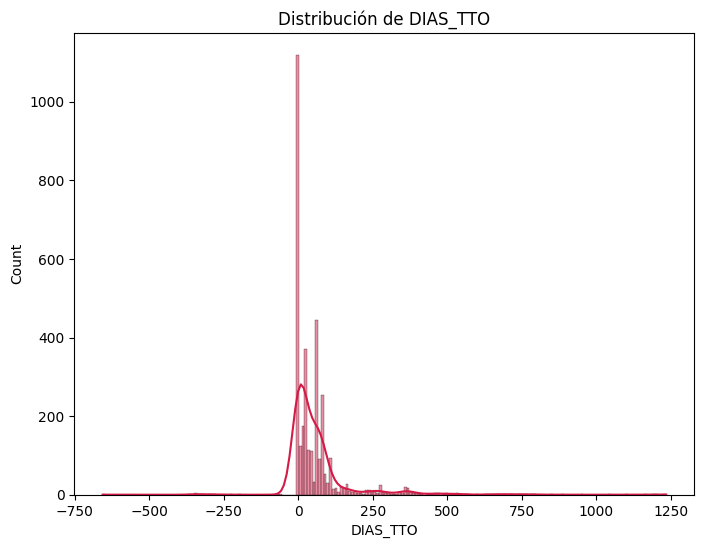

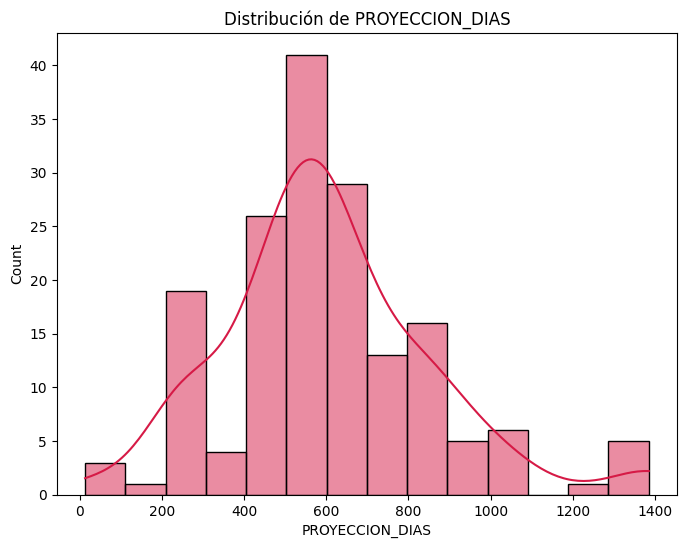

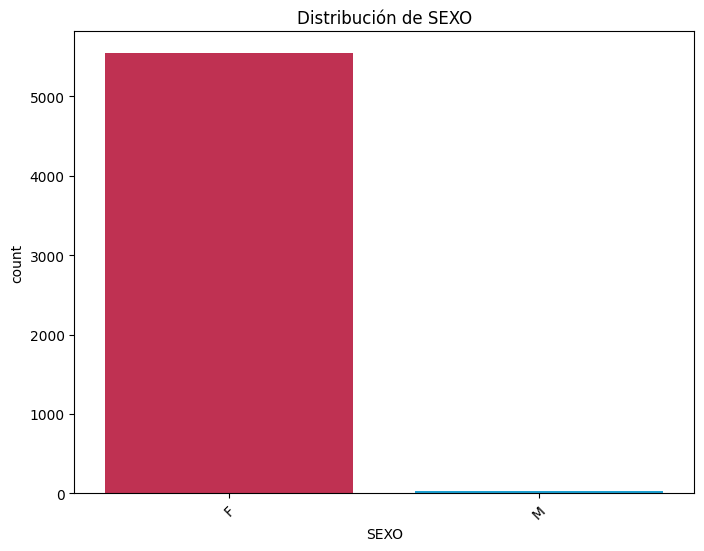

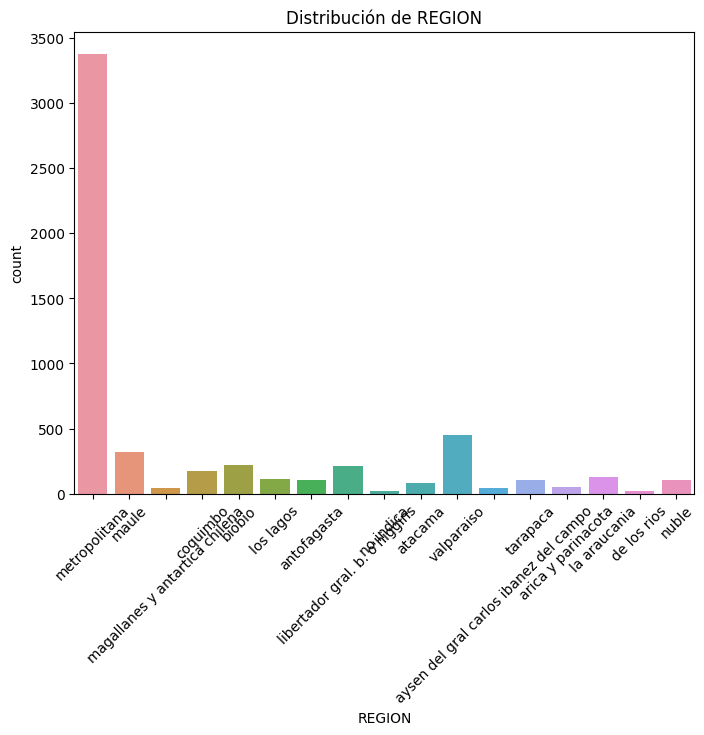

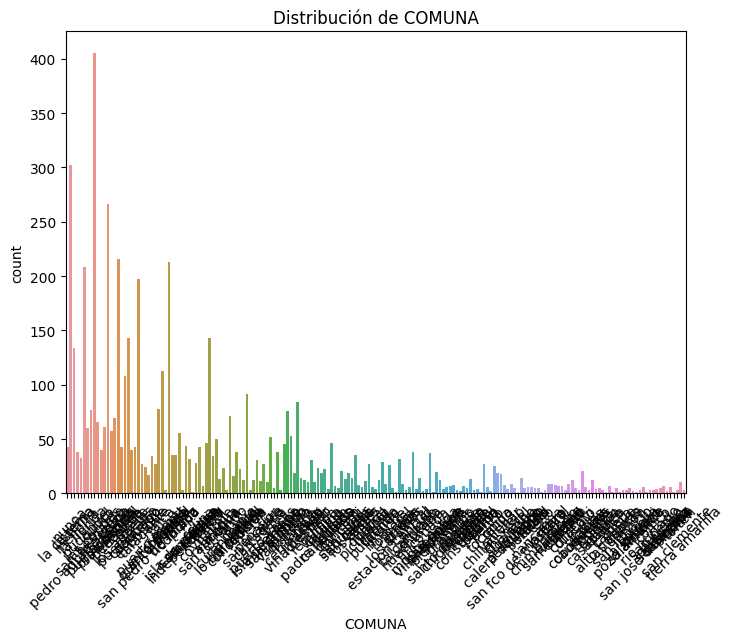

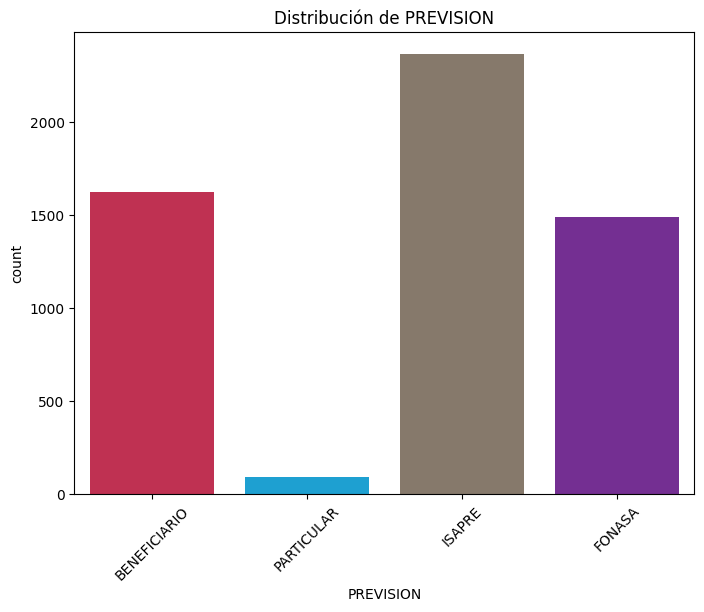

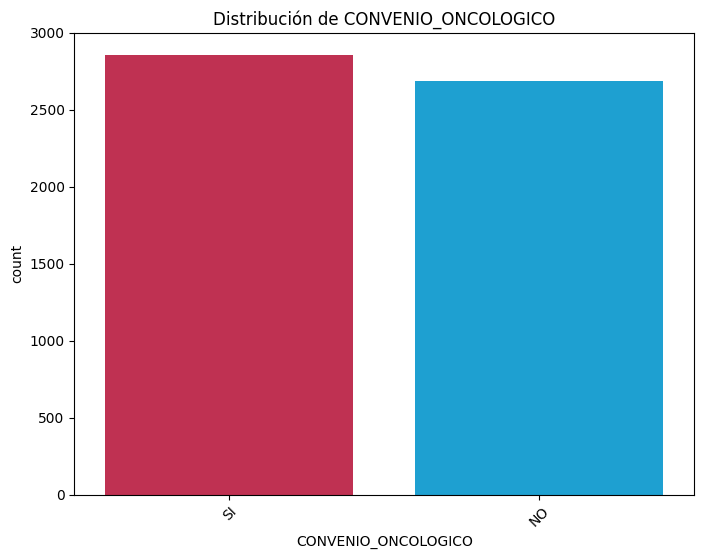

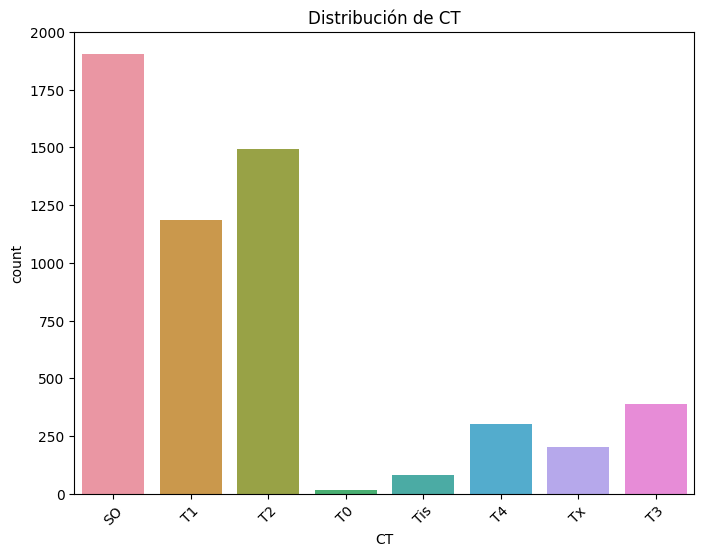

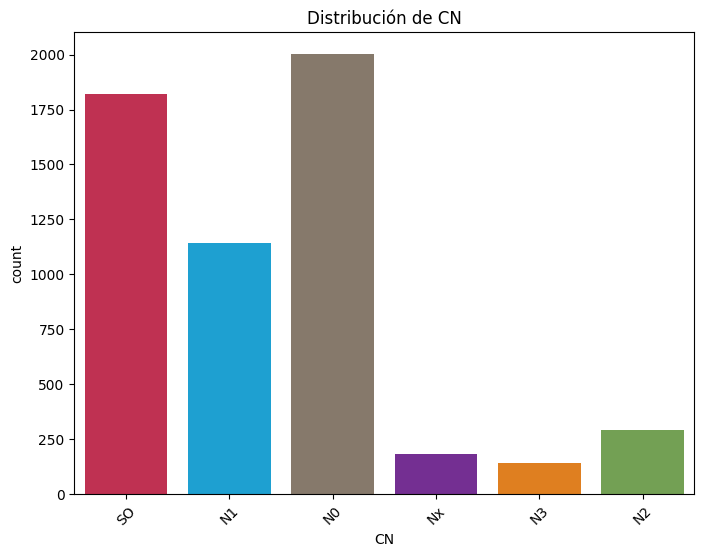

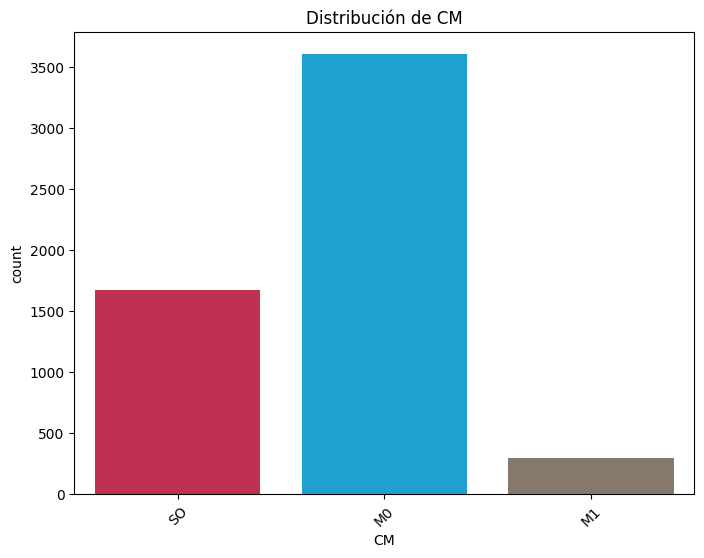

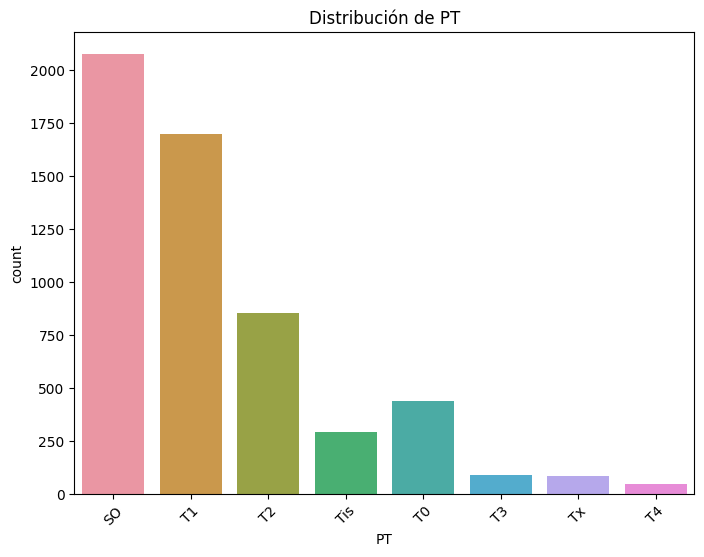

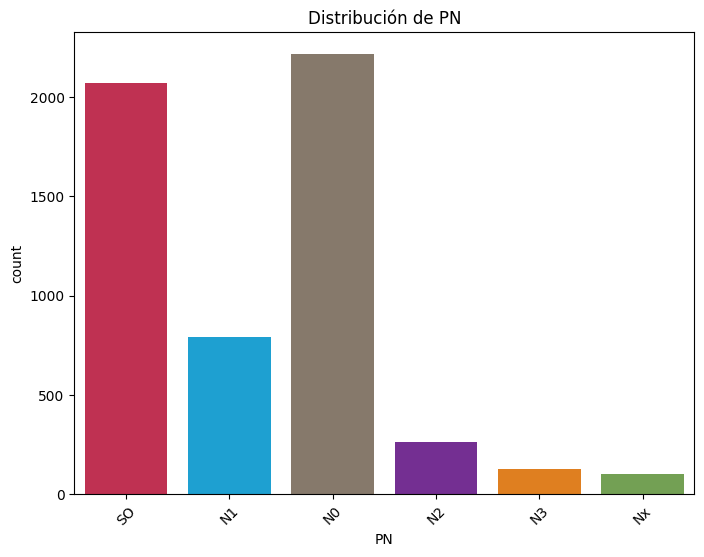

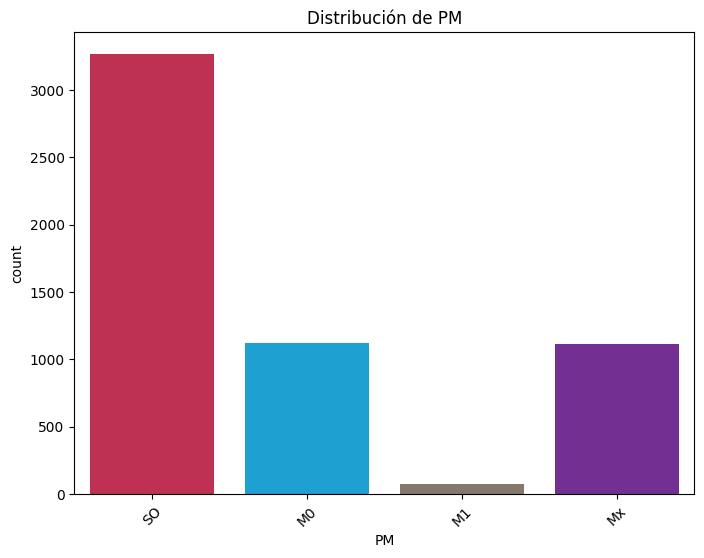

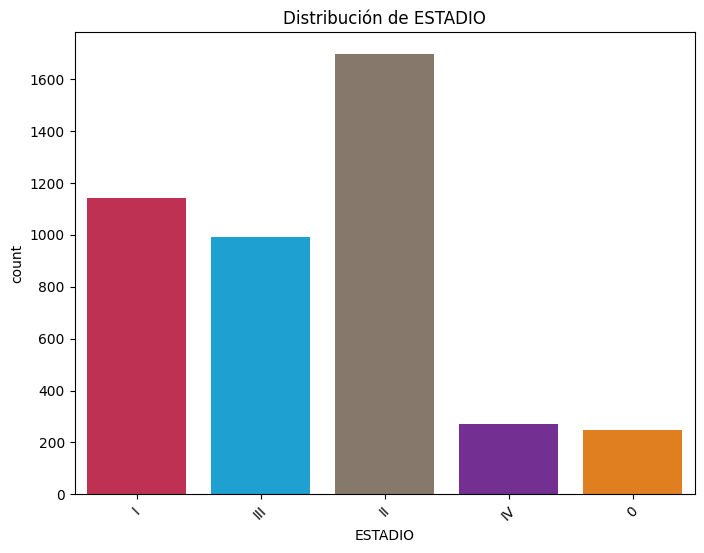

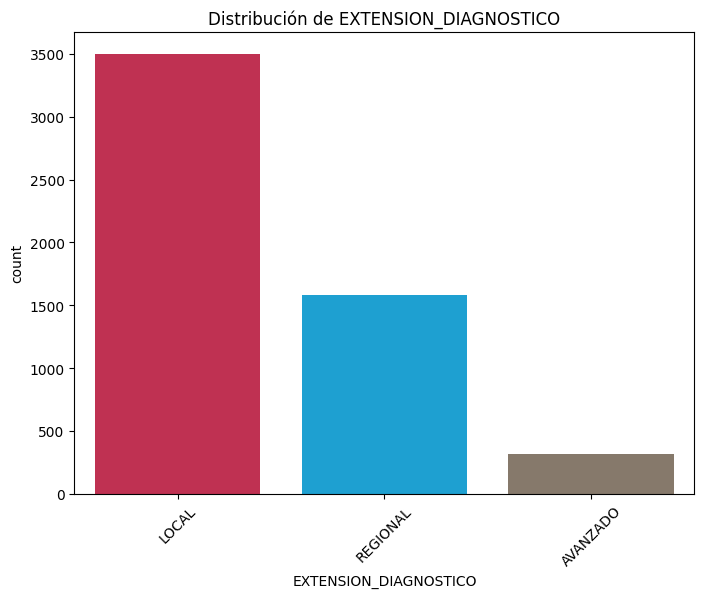

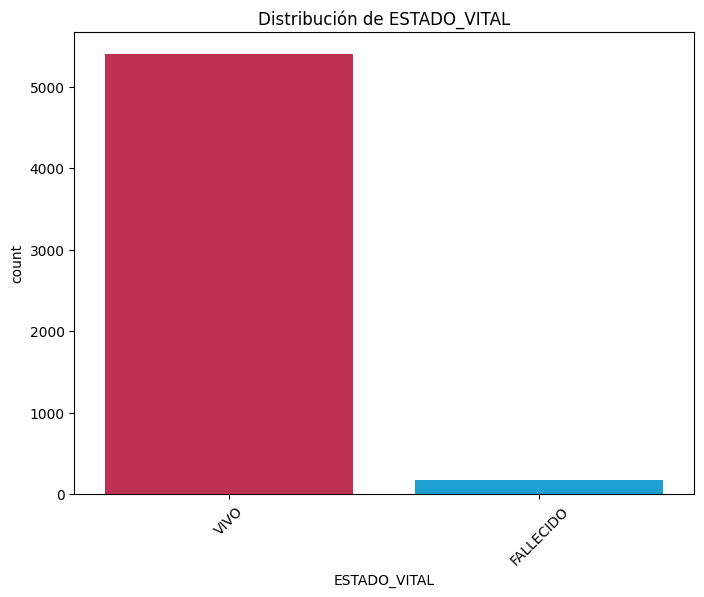

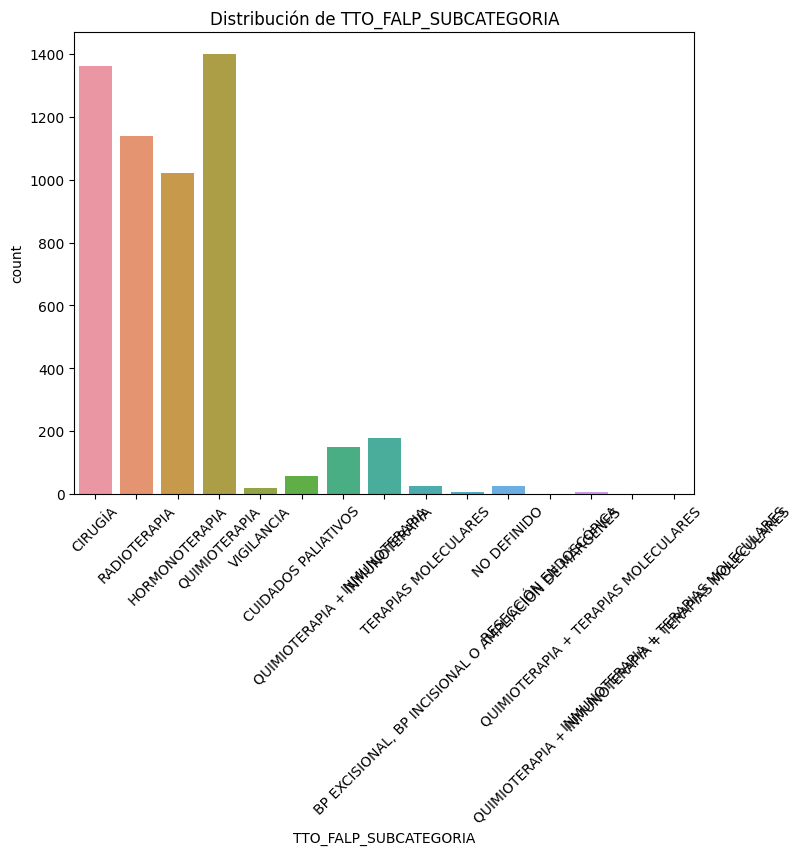

In [ ]:
fx.plot_variables(df_falp_mama)

## 5.3 Análisis de correlación
Realizamos este análisis para evaluar el comportamiento entre las variables.

* falta modificar las 6 variables entre 0 y 1 para poder hacer gráficos que muestren esas relaciones*

In [ ]:
correlation_matrix = mama.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## 5.4 Análisis de características
Examinamos la importancia de las características en relación con la variable objetivo.

# **6. Modelamiento**

In [ ]:
modelos = [
    {
        "nombre": "Naive Bayes",
        "modelo": MultinomialNB(),
        "param_grid": {
            "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "fit_prior": [True, False],
        },
    },
    {
        "nombre": "Arbol Clasificacion",
        "modelo": DecisionTreeClassifier(),
        "param_grid": {
            "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
            "max_leaf_nodes": [10, 50, 100],
            "criterion": ["gini", "entropy"],
            "min_samples_split": [0.05, 2],
        },
    },
    {
        "nombre": "Random Forest",
        "modelo": RandomForestClassifier(min_samples_split=2),
        "param_grid": {
            "max_depth": [5, 6, 7, 8, 9, 10],
            "n_estimators": [500, 600, 700, 800, 900, 1000],
            "max_leaf_nodes": [10, 50, 100],
        },
    },
    {
        "nombre": "Gradient Bossting",
        "modelo": GradientBoostingClassifier(min_samples_split=2),
        "param_grid": {
            "max_depth": [5, 6, 7, 8, 9, 10],
            "learning_rate": [0.001, 0.01, 0.1, 1],
            "max_leaf_nodes": [10, 50, 100],
        },
    },
    {
        "nombre": "SVM",
        "modelo": SVC(),
        "param_grid": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "poly"], "degree": [2, 3, 4]},
    },
]

## 6.1 Entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)

Training Naive Bayes ...
--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


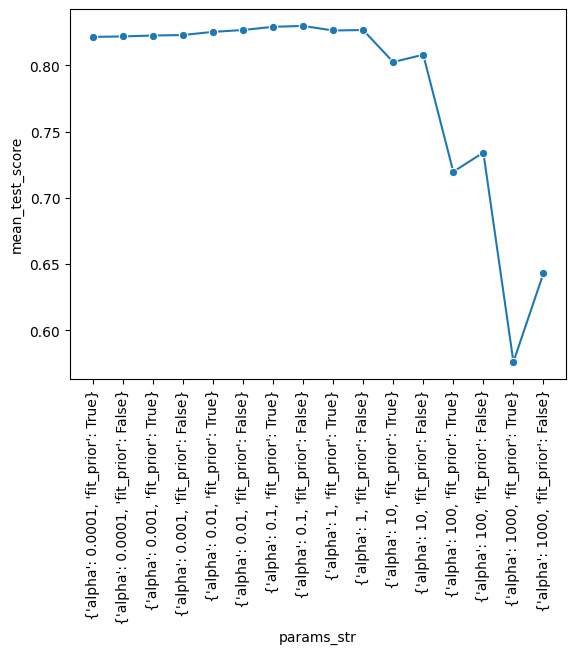

Los mejores parametros fueron: {'alpha': 0.1, 'fit_prior': False}
El mejor desempeno fue: 0.829655172413793


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           1       0.90      0.86      0.88       471
           2       0.83      0.78      0.80       563
           3       0.75      0.86      0.80       414

    accuracy                           0.83      1448
   macro avg       0.83      0.83      0.83      1448
weighted avg       0.83      0.83      0.83      1448

---------------------------------------------------------------------
Training Arbol Clasificacion ...
--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


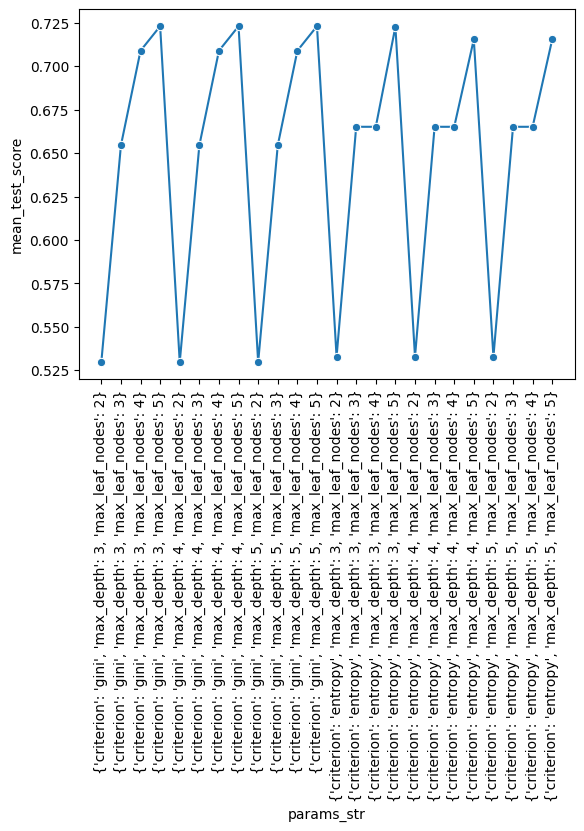

Los mejores parametros fueron: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}
El mejor desempeno fue: 0.723103448275862


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       471
           2       0.64      0.77      0.70       563
           3       0.72      0.62      0.66       414

    accuracy                           0.72      1448
   macro avg       0.74      0.71      0.72      1448
weighted avg       0.73      0.72      0.72      1448

---------------------------------------------------------------------
Training Random Forest ...
--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


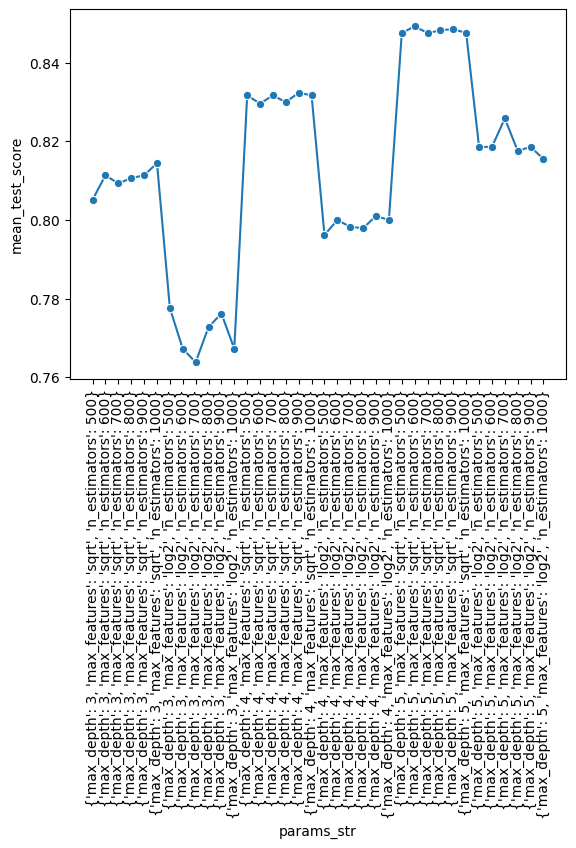

Los mejores parametros fueron: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 600}
El mejor desempeno fue: 0.849310344827586


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           1       0.90      0.87      0.88       471
           2       0.77      0.89      0.83       563
           3       0.91      0.75      0.82       414

    accuracy                           0.84      1448
   macro avg       0.86      0.84      0.84      1448
weighted avg       0.85      0.84      0.84      1448

---------------------------------------------------------------------
Training Gradient Bossting ...
--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


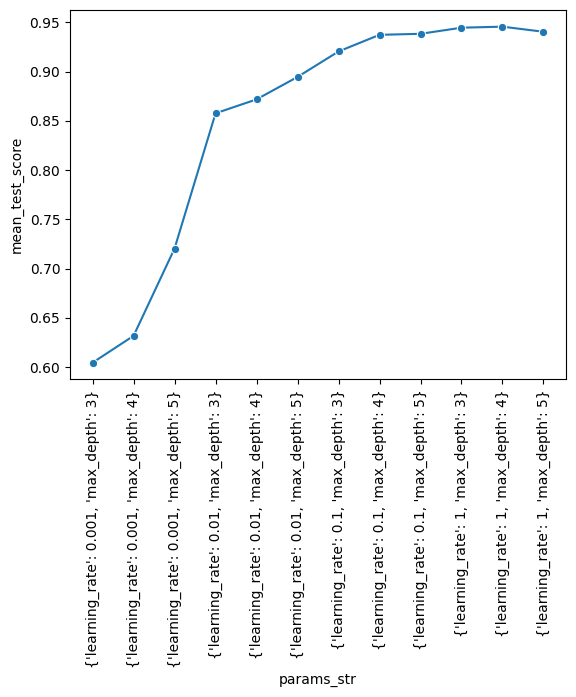

Los mejores parametros fueron: {'learning_rate': 1, 'max_depth': 4}
El mejor desempeno fue: 0.9455172413793103


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       471
           2       0.95      0.96      0.95       563
           3       0.95      0.93      0.94       414

    accuracy                           0.95      1448
   macro avg       0.95      0.95      0.95      1448
weighted avg       0.95      0.95      0.95      1448

---------------------------------------------------------------------
Training SVM ...
--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


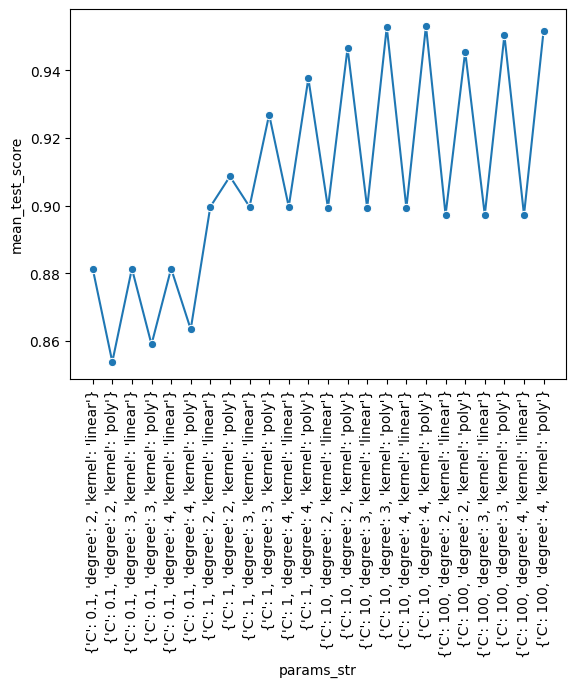

Los mejores parametros fueron: {'C': 10, 'degree': 4, 'kernel': 'poly'}
El mejor desempeno fue: 0.953103448275862


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       471
           2       0.95      0.96      0.95       563
           3       0.95      0.94      0.94       414

    accuracy                           0.96      1448
   macro avg       0.96      0.96      0.96      1448
weighted avg       0.96      0.96      0.96      1448

---------------------------------------------------------------------


In [ ]:
fx.entrenar_ensamble_de_modelos_gridcv(modelos, X_train, X_test, y_train, y_test)

## 6.2 Validación

In [ ]:
# Se eligió SVM como modelo por su métrica Recall
modelo_svc = SVC(C=10, degree= 4, kernel='poly').fit(X_train, y_train)
y_hat = modelo_svc.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       471
           2       0.95      0.96      0.95       563
           3       0.95      0.94      0.94       414

    accuracy                           0.96      1448
   macro avg       0.96      0.96      0.96      1448
weighted avg       0.96      0.96      0.96      1448



PENDIENTE: Análisis de las métricas obtenidas y gráfico de curva ROC

In [ ]:
pd.DataFrame(y_hat).value_counts()

2    569
1    468
3    411
dtype: int64

In [ ]:
y_test.value_counts()

2    563
1    471
3    414
Name: STATUS, dtype: int64

PENDIENTE: Unir data para comparar.

# **7. Función WebApp**

In [ ]:
@anvil.server.callable
def predict(ct, cm, cn, pt, pm, pn):
  # Formulario de todas las columnas
  # Hacer el predict

  total = int(ct)+int(cm)+int(cn)+int(pt)+int(pm)+int(pn)
  if total > 8:
    texto = '[URGENTE STATUS 3] Paciente necesita atención priorizada'
    return texto

In [ ]:
# Función para que el Notebook Colab esté siempre disponible para la App
anvil.server.wait_forever()